In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\Picture\\Green.jpg'
green_image = cv2.imread(image_path)

In [3]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(green_image)

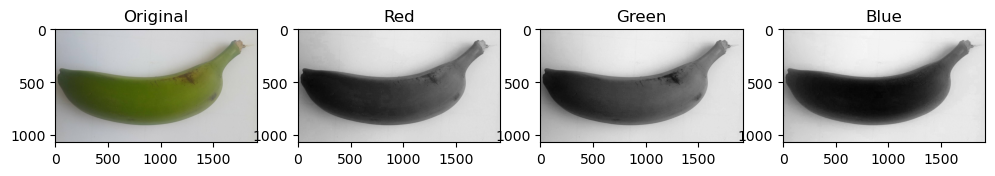

In [4]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(green_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

In [5]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\Picture\\Yellow.jpg'
yellow_image = cv2.imread(image_path)

In [6]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(yellow_image)

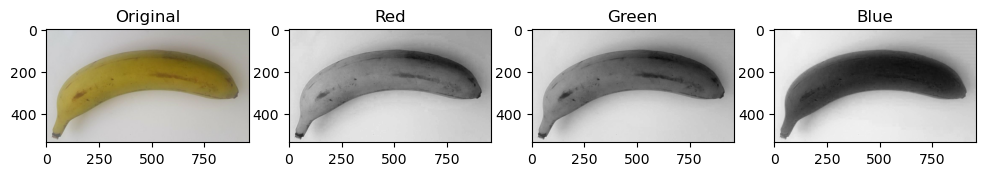

In [7]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(yellow_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

In [8]:
# Load the image
image_path = 'C:\\ESTERA\\CCT\\BANANAS\\Picture\\Ripe.jpg'
ripe_image = cv2.imread(image_path)

In [9]:
# Split the channels
blue_channel, green_channel, red_channel = cv2.split(ripe_image)

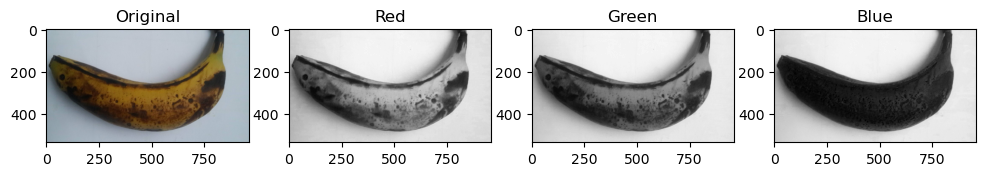

In [10]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Display the original image
axs[0].imshow(cv2.cvtColor(ripe_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')

# Display the red channel
axs[1].imshow(red_channel, cmap='gray')
axs[1].set_title('Red')

# Display the green channel
axs[2].imshow(green_channel, cmap='gray')
axs[2].set_title('Green')

# Display the blue channel
axs[3].imshow(blue_channel, cmap='gray')
axs[3].set_title('Blue')

# Show the plots
plt.show()

# CNN Model

In [2]:
file_path = 'C:\\ESTERA\\CCT\\BANANAS'

### Picture preprocessing

In [3]:
# Function to load and preprocess an image
def load_and_preprocess_image(file_path):
    # Load the image
    image = cv2.imread(file_path)
    
    # Resize the image to a consistent size (960x540)
    image = cv2.resize(image, (960, 540))
    
    # Scale picture to be between 0 and 1
    image = image.astype(np.float32) / 255.0
    
    return image

In [4]:
# Load and preprocess the dataset
image_paths = []
labels = []

# Loop through the class folders (Green, Yellow, Ripe)
for class_name in os.listdir(file_path):
    class_path = os.path.join(file_path, class_name)
    
    if os.path.isdir(class_path):
        # Labeling pictures based on folder name (Green = 0, Yellow = 1, Ripe = 2)
        if class_name.startswith('G'):
            label = 0
        elif class_name.startswith('Y'):
            label = 1
        elif class_name.startswith('R'):
            label = 2
        else:
            continue
        
        # Load and preprocess images in the class folder
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            if image_name.endswith('.jpg'):
                image = load_and_preprocess_image(image_path)
                image_paths.append(image_path)
                labels.append(label)

In [5]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### ML

In [6]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(image_paths, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
X_test

['C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R018.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g061.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y095.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y083.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R069.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R077.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g074.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g057.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y088.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R097.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g080.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g076.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g011.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g093.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g006.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y066.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g018.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Ripe\\R026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Green\\g031.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow\\Y026.jpg',
 'C:\\ESTERA\\CCT\\BANANAS\\Yellow

In [8]:
import time

### 1 layer

In [10]:
# Record the start time
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

Epoch 1/10
7/7 [==============================] - 75s 8s/step - loss: 350.7038 - accuracy: 0.3671 - val_loss: 69.1674 - val_accuracy: 0.6000
Epoch 2/10
7/7 [==============================] - 54s 8s/step - loss: 60.8347 - accuracy: 0.5024 - val_loss: 29.9934 - val_accuracy: 0.6222
Epoch 3/10
7/7 [==============================] - 46s 6s/step - loss: 26.7819 - accuracy: 0.7343 - val_loss: 14.7082 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 49s 6s/step - loss: 10.1977 - accuracy: 0.7729 - val_loss: 2.7622 - val_accuracy: 0.8667
Epoch 5/10
7/7 [==============================] - 46s 7s/step - loss: 3.1671 - accuracy: 0.8889 - val_loss: 0.9547 - val_accuracy: 0.9556
Epoch 6/10
7/7 [==============================] - 46s 6s/step - loss: 1.1943 - accuracy: 0.9469 - val_loss: 1.6526 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 49s 7s/step - loss: 0.5368 - accuracy: 0.9710 - val_loss: 0.7093 - val_accuracy: 0.9333
Epoch 8/10
7/7 [==========

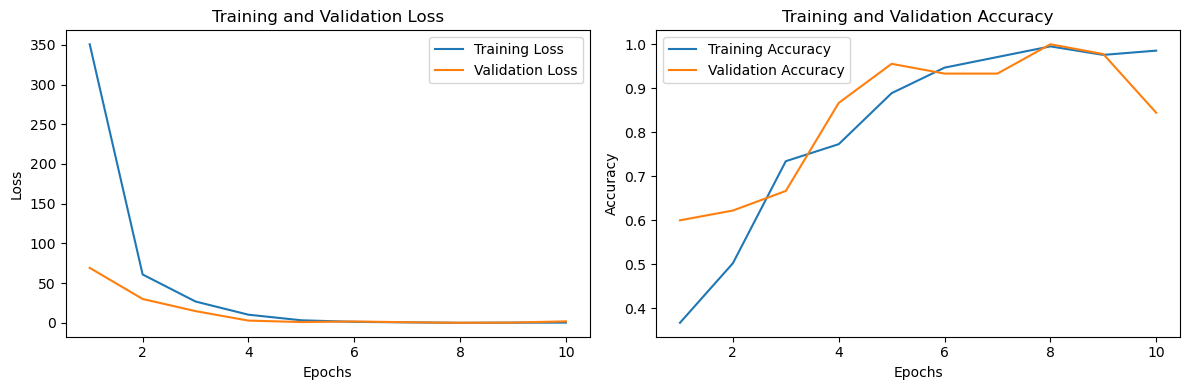

In [11]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### changed number of filters from 32 to 64

In [9]:
# Record the start time
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

Epoch 1/10
7/7 [==============================] - 1739s 242s/step - loss: 357.6259 - accuracy: 0.3527 - val_loss: 74.0340 - val_accuracy: 0.4000
Epoch 2/10
7/7 [==============================] - 1593s 221s/step - loss: 32.4178 - accuracy: 0.4444 - val_loss: 13.8767 - val_accuracy: 0.5778
Epoch 3/10
7/7 [==============================] - 1500s 210s/step - loss: 16.1827 - accuracy: 0.5266 - val_loss: 4.1524 - val_accuracy: 0.5778
Epoch 4/10
7/7 [==============================] - 1341s 179s/step - loss: 3.9602 - accuracy: 0.6087 - val_loss: 0.7895 - val_accuracy: 0.8444
Epoch 5/10
7/7 [==============================] - 1277s 176s/step - loss: 0.7274 - accuracy: 0.8744 - val_loss: 1.0458 - val_accuracy: 0.8000
Epoch 6/10
7/7 [==============================] - 1193s 171s/step - loss: 0.2950 - accuracy: 0.9420 - val_loss: 0.2044 - val_accuracy: 0.9556
Epoch 7/10
7/7 [==============================] - 1468s 212s/step - loss: 0.0744 - accuracy: 0.9662 - val_loss: 0.6833 - val_accuracy: 0.8889


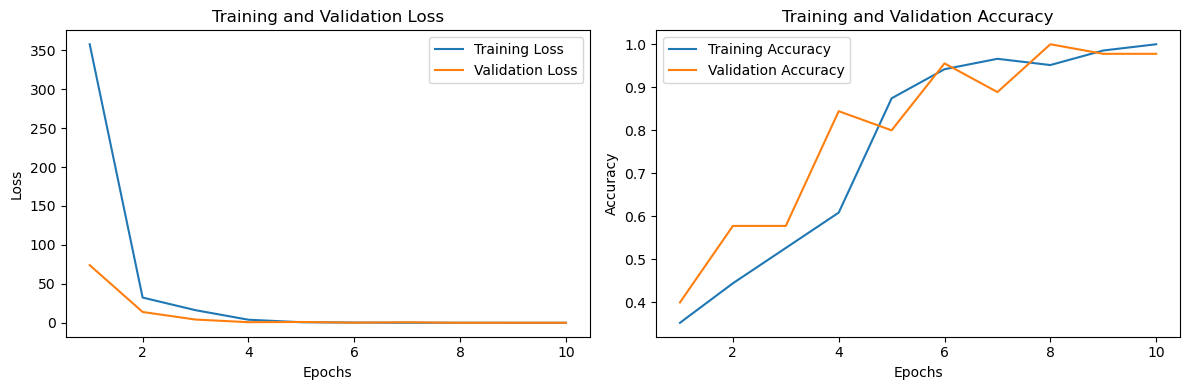

In [10]:

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 3 layers

In [12]:
# Record the start time
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

Epoch 1/10
7/7 [==============================] - 117s 10s/step - loss: 26.1158 - accuracy: 0.3237 - val_loss: 2.1093 - val_accuracy: 0.2889
Epoch 2/10
7/7 [==============================] - 64s 9s/step - loss: 1.1387 - accuracy: 0.5507 - val_loss: 0.3977 - val_accuracy: 0.8667
Epoch 3/10
7/7 [==============================] - 65s 9s/step - loss: 0.5465 - accuracy: 0.7150 - val_loss: 0.3952 - val_accuracy: 0.8667
Epoch 4/10
7/7 [==============================] - 66s 9s/step - loss: 0.3644 - accuracy: 0.8647 - val_loss: 0.4430 - val_accuracy: 0.7111
Epoch 5/10
7/7 [==============================] - 62s 9s/step - loss: 0.1767 - accuracy: 0.9324 - val_loss: 0.0783 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 62s 9s/step - loss: 0.0840 - accuracy: 0.9807 - val_loss: 0.0619 - val_accuracy: 0.9778
Epoch 7/10
7/7 [==============================] - 61s 9s/step - loss: 0.0324 - accuracy: 0.9952 - val_loss: 0.0965 - val_accuracy: 0.9778
Epoch 8/10
7/7 [===============

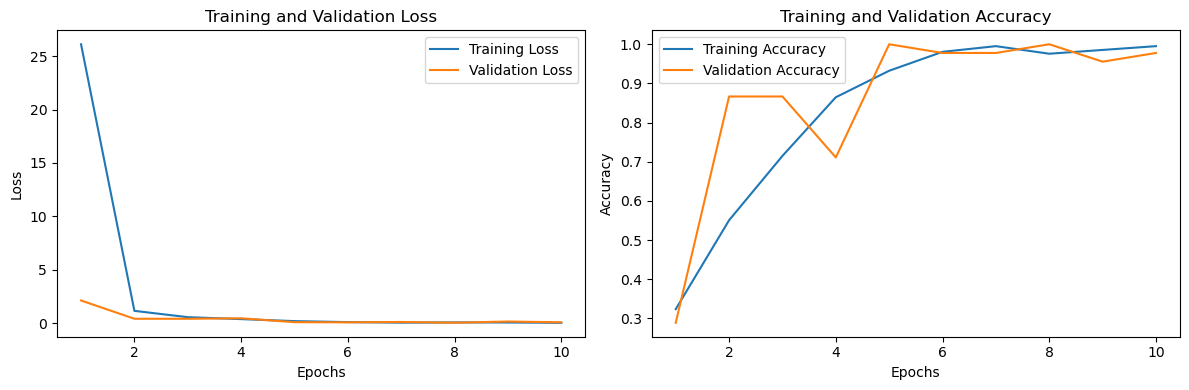

In [13]:
import matplotlib.pyplot as plt

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Predict class probabilities for your validation data
class_probabilities = model.predict(X_val_pixels)

# Now, you can loop through the predictions for each image
for i, class_probs in enumerate(class_probabilities):
    print(f"Image {i+1} class probabilities:")
    for class_index, prob in enumerate(class_probs):
        print(f"Class {class_index}: {prob*100:.2f}%")

2/2 [==============================] - 7s 814ms/step
Image 1 class probabilities:
Class 0: 0.00%
Class 1: 11.68%
Class 2: 88.32%
Image 2 class probabilities:
Class 0: 0.00%
Class 1: 99.96%
Class 2: 0.04%
Image 3 class probabilities:
Class 0: 0.00%
Class 1: 57.79%
Class 2: 42.21%
Image 4 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 5 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 6 class probabilities:
Class 0: 99.97%
Class 1: 0.03%
Class 2: 0.00%
Image 7 class probabilities:
Class 0: 0.00%
Class 1: 99.99%
Class 2: 0.01%
Image 8 class probabilities:
Class 0: 0.00%
Class 1: 0.61%
Class 2: 99.39%
Image 9 class probabilities:
Class 0: 0.00%
Class 1: 99.64%
Class 2: 0.36%
Image 10 class probabilities:
Class 0: 0.00%
Class 1: 1.12%
Class 2: 98.88%
Image 11 class probabilities:
Class 0: 0.00%
Class 1: 99.89%
Class 2: 0.11%
Image 12 class probabilities:
Class 0: 100.00%
Class 1: 0.00%
Class 2: 0.00%
Image 13 class probabilities:
Class 0: 

### 5 layers

In [15]:
# Record the start time
start_time = time.time()

# Define the neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"Time taken: {elapsed_time} seconds")

Epoch 1/10
7/7 [==============================] - 77s 10s/step - loss: 1.1297 - accuracy: 0.3671 - val_loss: 0.9594 - val_accuracy: 0.5556
Epoch 2/10
7/7 [==============================] - 150s 22s/step - loss: 0.8168 - accuracy: 0.5990 - val_loss: 0.9804 - val_accuracy: 0.5778
Epoch 3/10
7/7 [==============================] - 156s 23s/step - loss: 0.6169 - accuracy: 0.7440 - val_loss: 0.4733 - val_accuracy: 0.7778
Epoch 4/10
7/7 [==============================] - 153s 22s/step - loss: 0.3837 - accuracy: 0.8406 - val_loss: 0.2663 - val_accuracy: 0.8667
Epoch 5/10
7/7 [==============================] - 151s 22s/step - loss: 0.2385 - accuracy: 0.9034 - val_loss: 0.2001 - val_accuracy: 0.9333
Epoch 6/10
7/7 [==============================] - 151s 22s/step - loss: 0.1925 - accuracy: 0.9130 - val_loss: 0.2732 - val_accuracy: 0.8667
Epoch 7/10
7/7 [==============================] - 154s 22s/step - loss: 0.1834 - accuracy: 0.9130 - val_loss: 0.1436 - val_accuracy: 0.8889
Epoch 8/10
7/7 [=====

In [16]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

AttributeError: 'History' object has no attribute 'history5'

### Dropout

In [26]:
from tensorflow.keras.layers import Dropout

# Define the neural network model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.5), 
    keras.layers.Dense(3, activation='softmax') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training data
X_train_paths = X_train  
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val 
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

Epoch 1/10
7/7 [==============================] - 89s 11s/step - loss: 17.0601 - accuracy: 0.3527 - val_loss: 1.1395 - val_accuracy: 0.4889
Epoch 2/10
7/7 [==============================] - 69s 10s/step - loss: 1.1214 - accuracy: 0.4300 - val_loss: 0.7449 - val_accuracy: 0.6444
Epoch 3/10
7/7 [==============================] - 70s 10s/step - loss: 0.6528 - accuracy: 0.7053 - val_loss: 0.5077 - val_accuracy: 0.7111
Epoch 4/10
7/7 [==============================] - 66s 9s/step - loss: 0.4544 - accuracy: 0.8116 - val_loss: 0.1362 - val_accuracy: 0.9778
Epoch 5/10
7/7 [==============================] - 64s 9s/step - loss: 0.2377 - accuracy: 0.9082 - val_loss: 0.0552 - val_accuracy: 0.9778
Epoch 6/10
7/7 [==============================] - 67s 9s/step - loss: 0.1120 - accuracy: 0.9565 - val_loss: 0.0303 - val_accuracy: 0.9778
Epoch 7/10
7/7 [==============================] - 67s 10s/step - loss: 0.0279 - accuracy: 0.9903 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 8/10
7/7 [=============

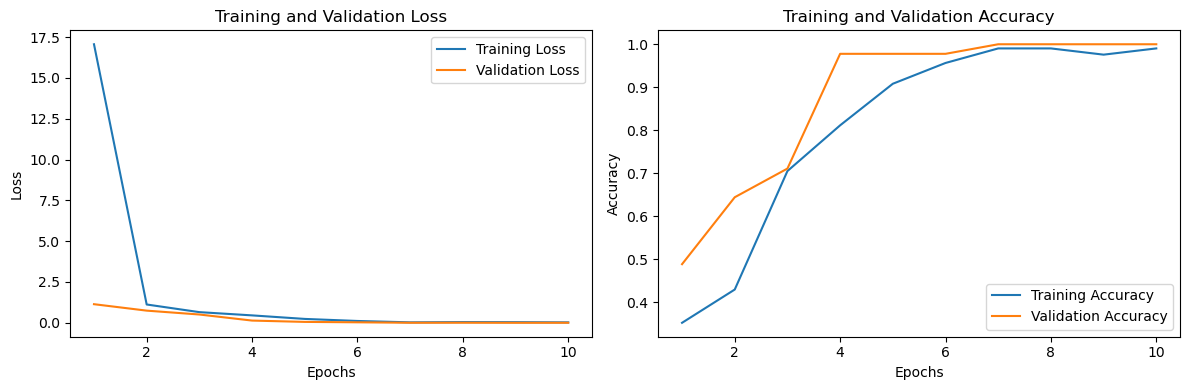

In [27]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Early Stop

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(540, 960, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax') 
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
    )


In [23]:
# Training data
X_train_paths = X_train 
X_train_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_train_paths])
y_train = np.array(y_train)

# Validation data
X_val_paths = X_val  
X_val_pixels = np.array([load_and_preprocess_image(image_path) for image_path in X_val_paths])
y_val = np.array(y_val)

# Training
batch_size = 32
epochs = 10

history = model.fit(
    X_train_pixels,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_pixels, y_val)
)

Epoch 1/10
7/7 [==============================] - 86s 10s/step - loss: 23.2469 - accuracy: 0.3430 - val_loss: 3.2071 - val_accuracy: 0.3111
Epoch 2/10
7/7 [==============================] - 73s 11s/step - loss: 1.1015 - accuracy: 0.5797 - val_loss: 0.8733 - val_accuracy: 0.7111
Epoch 3/10
7/7 [==============================] - 74s 11s/step - loss: 0.4026 - accuracy: 0.8599 - val_loss: 0.1086 - val_accuracy: 0.9778
Epoch 4/10
7/7 [==============================] - 69s 10s/step - loss: 0.0710 - accuracy: 0.9807 - val_loss: 0.2115 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 69s 10s/step - loss: 0.0250 - accuracy: 0.9952 - val_loss: 0.1667 - val_accuracy: 0.9778
Epoch 6/10
7/7 [==============================] - 70s 10s/step - loss: 0.1808 - accuracy: 0.9227 - val_loss: 0.3521 - val_accuracy: 0.8000
Epoch 7/10
7/7 [==============================] - 71s 10s/step - loss: 0.2123 - accuracy: 0.9372 - val_loss: 0.0318 - val_accuracy: 1.0000
Epoch 8/10
7/7 [==========

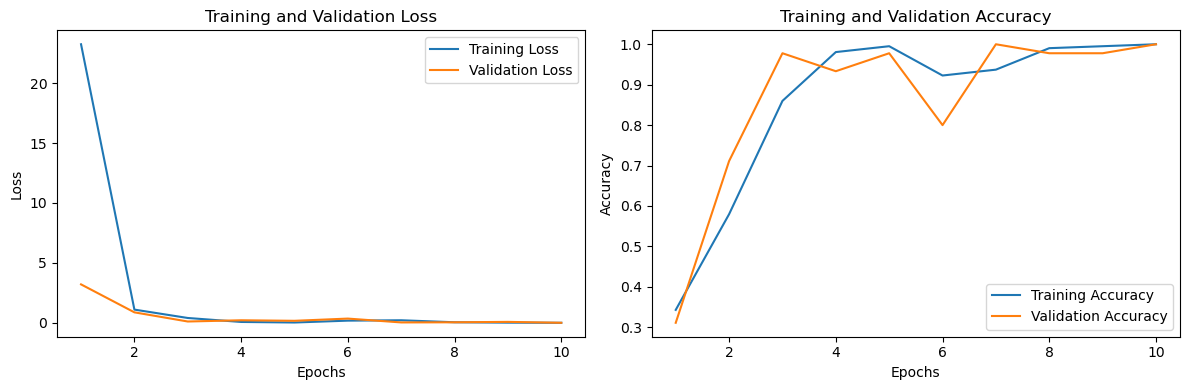

In [25]:
# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()